In [2]:
import os
import pandas as pd
from pathlib import Path
from data_defs import check, shape, plot_boxplots, plot_histograms

In [3]:
# construindo um caminho dinamico
FILE = 'predictions_with_features.csv'
BASE_DIR = Path(os.getcwd()).resolve().parent
PATH = BASE_DIR / 'data' / '07_model_output'
PATH.mkdir(parents=True, exist_ok=True)
RESULTS_FILE_PATH = PATH / FILE

RESULTS_FILE_PATH

WindowsPath('C:/Users/pesso/Documents/DevProjects/GitHubRepositories/ml_models/infnet_04_ml_engineering_pd/data/07_model_output/predictions_with_features.csv')

In [4]:
# Lendo os resultados
df = pd.read_csv(RESULTS_FILE_PATH)

In [5]:
check(df)

,coluna,tipo,únicos,null_soma,media,desvio,minimo,25%,mediana,75%,maximo,moda,frequência_moda
0,lat,float64,437,0,33.849664,0.08291,33.2533,33.8053,33.8353,33.8773,34.0793,33.8023,105
1,lon,float64,480,0,-118.263813,0.157617,-118.5198,-118.4218,-118.2578,-118.1158,-118.0218,-118.0418,45
2,minutes_remaining,int64,12,0,4.107688,3.449276,0.0,1.0,4.0,7.0,11.0,0,1358
3,period,int64,7,0,2.704171,1.149971,1.0,2.0,3.0,4.0,7.0,4,1947
4,playoffs,bool,2,0,n/a,n/a,n/a,n/a,n/a,n/a,n/a,False,5544
5,shot_distance,int64,54,0,25.581855,4.067015,0.0,24.0,25.0,26.0,79.0,25,1971
6,decision_tree_hat,bool,2,0,n/a,n/a,n/a,n/a,n/a,n/a,n/a,False,4133
7,logistic_regression_hat,bool,2,0,n/a,n/a,n/a,n/a,n/a,n/a,n/a,False,6423


In [6]:
shape(df, "predictions")

,predictions
,
Float64,2
Int64,3
Linhas Duplicadas,32
Linhas com Nulos,0
Linhas Únicas,6394
Object,0
Total Colunas,8
Total Linhas,6426


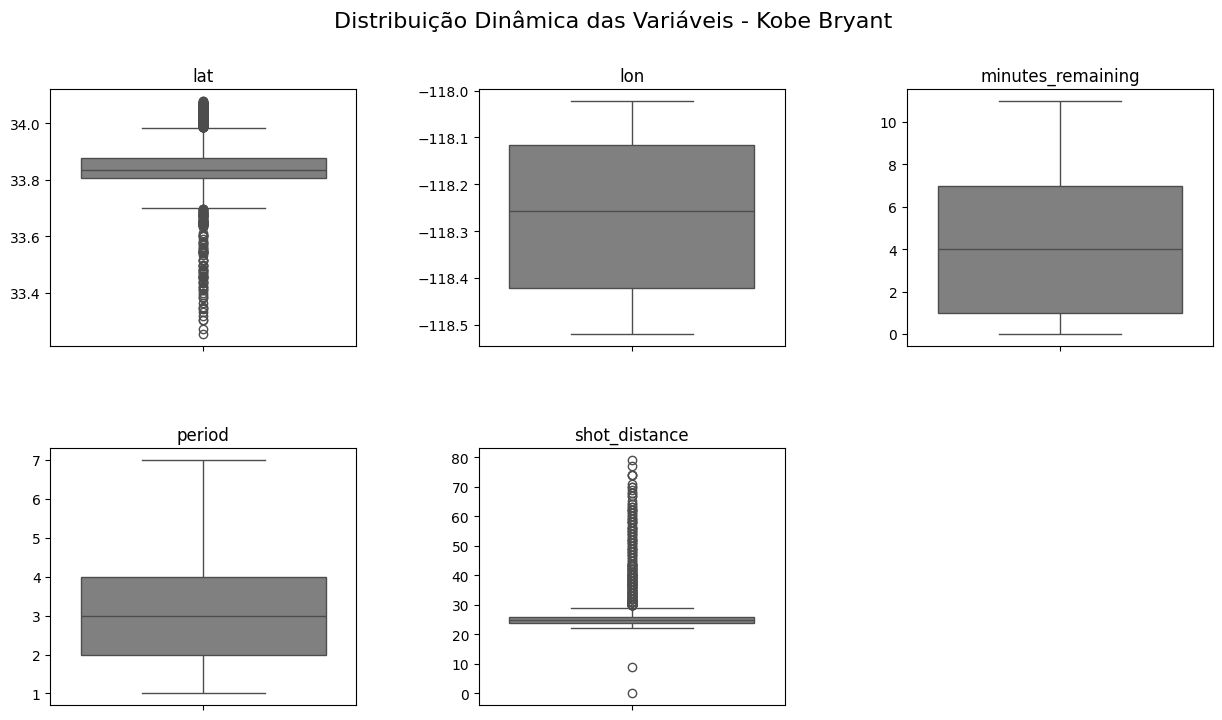

In [7]:
plot_boxplots(df, 'Kobe Bryant')

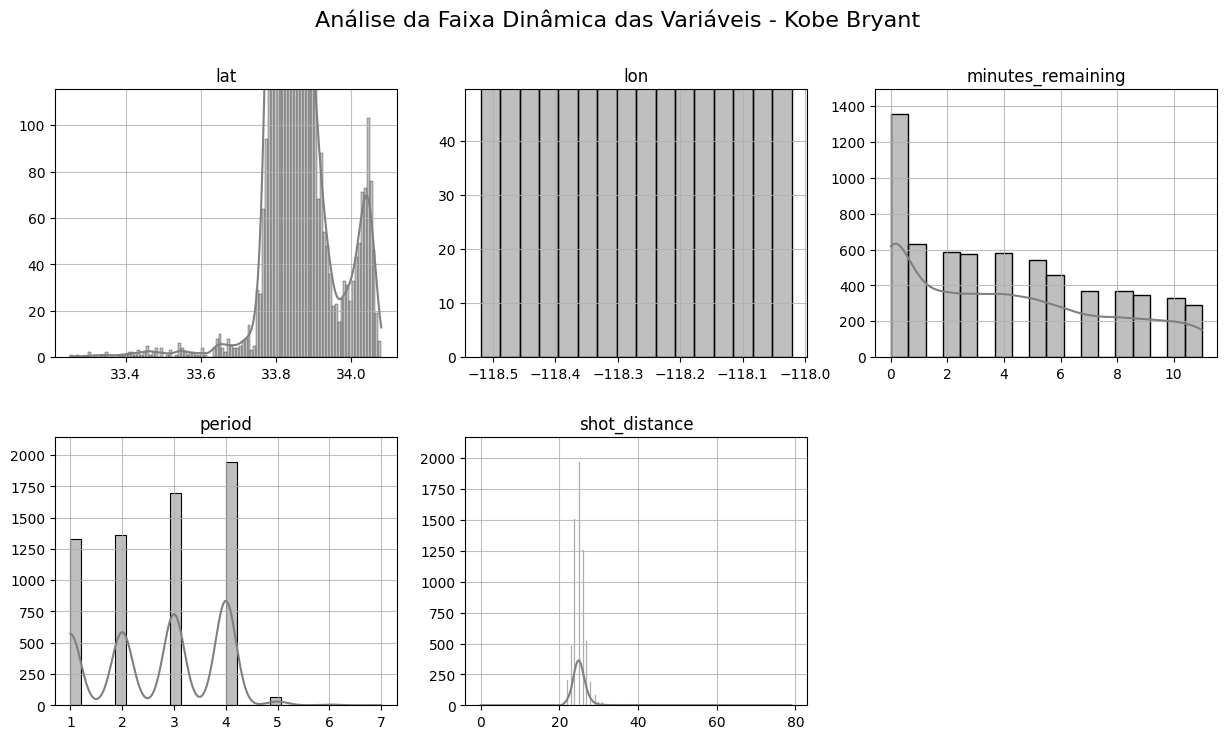

In [8]:
plot_histograms(df, 'Kobe Bryant')

In [9]:
df.columns

Index(['lat', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'shot_distance', 'decision_tree_hat', 'logistic_regression_hat'],
      dtype='object')

In [10]:
# Contar os valores únicos em cada coluna
decision_tree_counts = df['decision_tree_hat'].value_counts()
logistic_counts = df['logistic_regression_hat'].value_counts()

# Criar o DataFrame combinando as contagens
counts_df = pd.DataFrame(
                            {
                            "Predições da Regressão Logística": logistic_counts,
                            "Predições da Árvore de Decisão": decision_tree_counts
                            }
                        )

counts_df

,Predições da Regressão Logística,Predições da Árvore de Decisão
False,6423,4133
True,3,2293


In [28]:
import mlflow

if mlflow.active_run():
    print(f"Finalizando execução ativa com ID {mlflow.active_run().info.run_id}")
    mlflow.end_run()

else:
    print("aaa")

aaa


In [ ]:
import mlflow

mlflow.set_experiment("eng_ml_experiments")

with mlflow.start_run():
    # Registrar uma métrica para iniciar o experimento
    mlflow.log_metric("test_metric", 0.99)

print("Experimento inicializado com sucesso!")